Resources:
- Darts Forecasting 🎯 Deep Learning & Global Models
 https://www.kaggle.com/code/ferdinandberr/darts-forecasting-deep-learning-global-models
- Pytorch Forecasting => TemporalFusionTransformer
 https://www.kaggle.com/code/luisblanche/pytorch-forecasting-temporalfusiontransformer
- 🛒 Sales Forecasting | Using gluonts
 https://www.kaggle.com/code/antoinegruson/sales-forecasting-using-gluonts
- Store Sales - Time Series Forecasting
 https://www.kaggle.com/code/sdeogade/store-sales-time-series-forecasting

In [16]:
import pandas as pd

In [34]:
train_file_path = "/Users/aizhanm/Desktop/UM-4/demandForecasting/data/source_files/train.csv"

df = pd.read_csv(train_file_path, parse_dates=["date"])
df['date'] = pd.to_datetime(df['date'])

# Dataset

In [37]:
import plotly.express as px

a = df.set_index("date").groupby("family").resample("D").sales.sum().reset_index()
px.line(a, x = "date", y= "sales", color = "family", title = "Daily total sales of each product family")

<Axes: xlabel='date'>

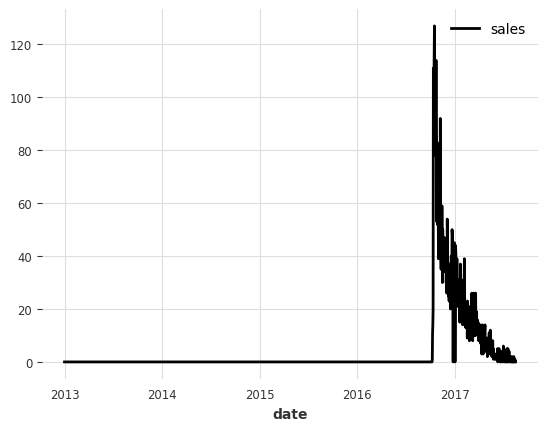

In [38]:
from darts import TimeSeries

filtered = a[a['family'] == 'BOOKS']

series = TimeSeries.from_dataframe(
    filtered, time_col="date", value_cols="sales", fill_missing_dates=True, freq='D'
)
series.plot()

In [39]:
train, val = series.split_before(0.85)

# ARIMA

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<Axes: xlabel='date'>

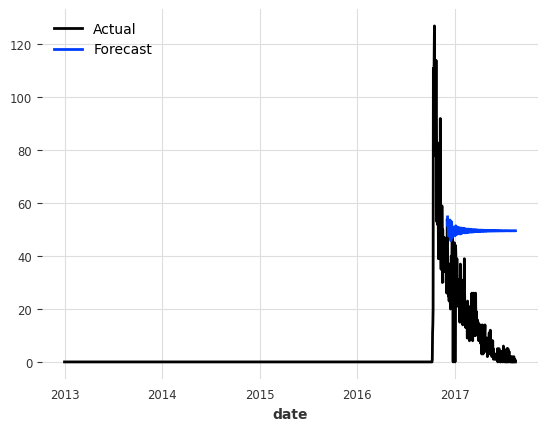

In [40]:
from darts.models import ARIMA

model = ARIMA(p=12, d=1, q=2)
model.fit(train)
forecast = model.predict(len(val))

series.plot(label="Actual")
forecast.plot(label="Forecast")

In [41]:
from darts.metrics import mae

error = mae(val, forecast)
print(f"MAE: {error:.2f}")

MAE: 36.98


# Temporal Fusion Transformer